# Nobel Winners Data Explored

## Setup

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [3]:
matplotlib.style.use("seaborn-v0_8")
plt.rcParams["figure.figsize"] = (8,4)
plt.rcParams["font.size"] = 14

## Starting to Explore

In [4]:
df = pd.read_json("../nobel_winners_cleaned.json")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   link            981 non-null    object
 1   name            981 non-null    object
 2   year            981 non-null    int64 
 3   category        981 non-null    object
 4   country         981 non-null    object
 5   text            981 non-null    object
 6   date_of_birth   981 non-null    object
 7   place_of_birth  980 non-null    object
 8   gender          981 non-null    object
 9   date_of_death   681 non-null    object
 10  place_of_death  679 non-null    object
 11  award_age       981 non-null    int64 
 12  born_in         140 non-null    object
 13  image_urls      659 non-null    object
 14  mini_bio        659 non-null    object
 15  bio_image       659 non-null    object
dtypes: int64(2), object(14)
memory usage: 122.8+ KB


In [6]:
df.date_of_birth = pd.to_datetime(df.date_of_birth)
df.date_of_death = pd.to_datetime(df.date_of_death)

## Gender Disparities

#### Female Physics Nobel Prize winners

In [7]:
by_cat_gen = df.groupby(["category", "gender"])
by_cat_gen.get_group(("Physics", "female"))[["name", "year"]]

,name,year
62,Andrea Ghez,2020
68,Anne L'Huillier,2023
210,Donna Strickland,2018
616,Maria Goeppert-Mayer,1963
618,Marie Skłodowska-Curie,1903


#### Number of Nobel Prize winners, by gender, in each category

In [8]:
by_cat_gen.size()

category                gender
Chemistry               female      8
                        male      187
Economics               female      3
                        male       93
Literature              female     18
                        male      102
Peace                   female     19
                        male       92
Physics                 female      5
                        male      223
Physiology or Medicine  female     13
                        male      218
dtype: int64

<Axes: ylabel='category,gender'>

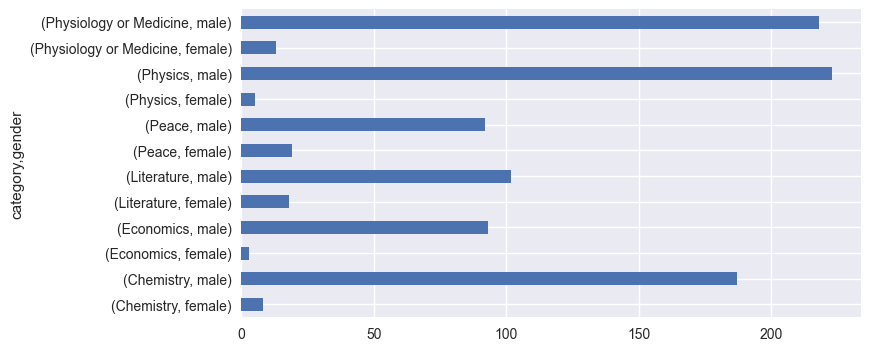

In [9]:
by_cat_gen.size().plot(kind="barh")

<Axes: ylabel='category'>

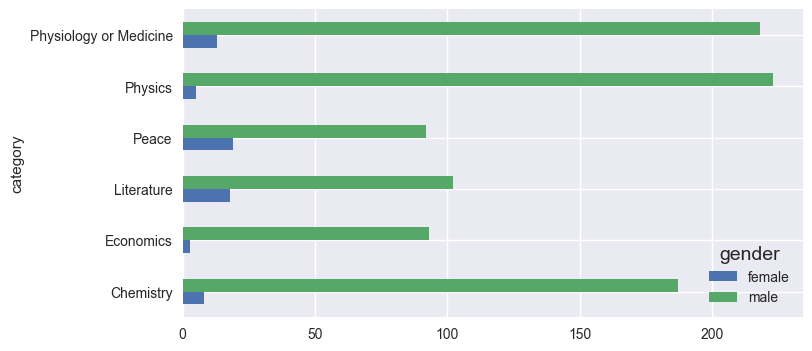

In [10]:
# unstacked
by_cat_gen.size().unstack().plot(kind="barh")

In [11]:
cat_gen_sz = by_cat_gen.size().unstack()
cat_gen_sz

gender,female,male
category,,
Chemistry,8,187
Economics,3,93
Literature,18,102
Peace,19,92
Physics,5,223
Physiology or Medicine,13,218


In [12]:
cat_gen_sz["ratio"] = cat_gen_sz.female / (cat_gen_sz.female + cat_gen_sz.male)
cat_gen_sz

gender,female,male,ratio
category,,,
Chemistry,8,187,0.041026
Economics,3,93,0.031250
Literature,18,102,0.150000
Peace,19,92,0.171171
Physics,5,223,0.021930
Physiology or Medicine,13,218,0.056277


#### Percentage of female nobel prize winners per category

In [13]:
cat_gen_sz["female_pc"] = cat_gen_sz["ratio"] * 100
cat_gen_sz

gender,female,male,ratio,female_pc
category,,,,
Chemistry,8,187,0.041026,4.102564
Economics,3,93,0.031250,3.125000
Literature,18,102,0.150000,15.000000
Peace,19,92,0.171171,17.117117
Physics,5,223,0.021930,2.192982
Physiology or Medicine,13,218,0.056277,5.627706


Text(0.5, 0, '% of female winners')

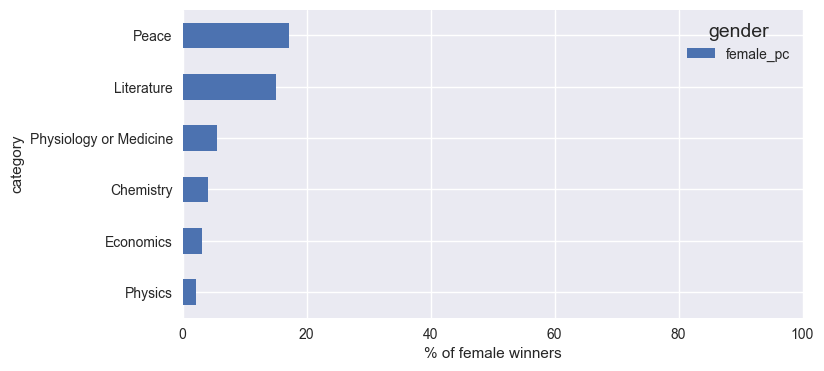

In [14]:
cat_gen_sz = cat_gen_sz.sort_values(by="female_pc", ascending=True)
ax = cat_gen_sz[["female_pc"]].plot(kind="barh")
ax.set_xlim([0,100])
ax.set_xlabel("% of female winners")

### Historical Trends

#### Prizes by year and gender

In [15]:
def thin_xticks(ax, tick_gap=10, rotation=45):
    """ Thin x-ticks and adjust rotation """
    ticks = ax.xaxis.get_ticklocs()
    ticklabels = [l.get_text() for l in ax.xaxis.get_ticklabels()]
    ax.xaxis.set_ticks(ticks[::tick_gap])
    ax.xaxis.set_ticklabels(ticklabels[::tick_gap], rotation=rotation)
    plt.show()

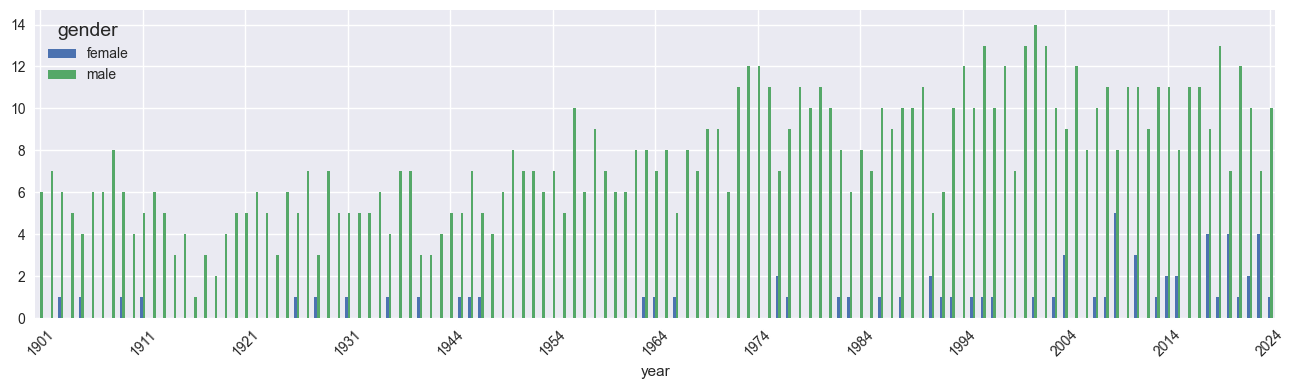

In [16]:
by_year_gender = df.groupby(["year", "gender"])
year_gen_sz = by_year_gender.size().unstack()
ax = year_gen_sz.plot(kind="bar", figsize=(16,4))
thin_xticks(ax)

#### Stacked gender prizes by year

Text(0.5, 0, 'Year')

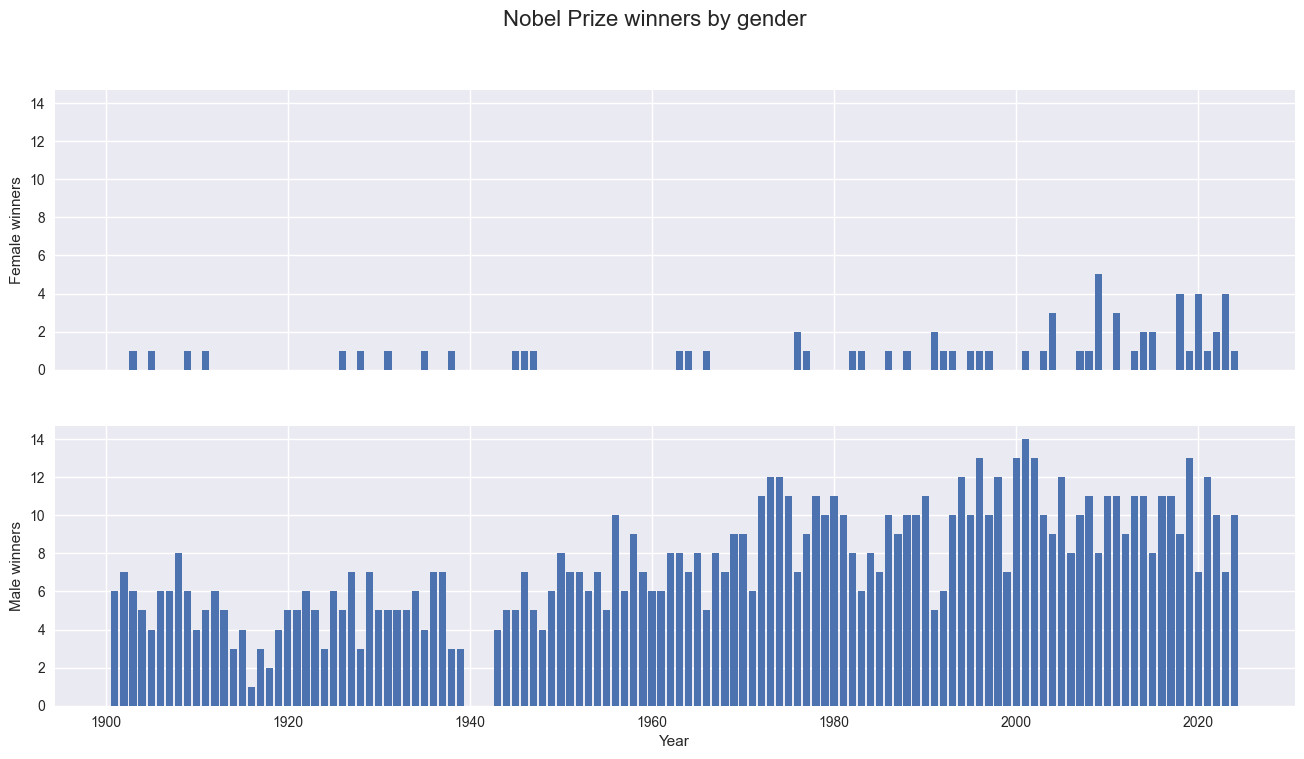

In [17]:
new_index = pd.Index(np.arange(1901, 2025), name="year")
year_gen_sz = year_gen_sz.reindex(new_index)

fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True, figsize=(16,8))

ax_f = axes[0]
ax_m = axes[1]

fig.suptitle("Nobel Prize winners by gender", fontsize=16)

ax_f.bar(year_gen_sz.index, year_gen_sz.female)
ax_f.set_ylabel("Female winners")

ax_m.bar(year_gen_sz.index, year_gen_sz.male)
ax_m.set_ylabel("Male winners")

ax_m.set_xlabel("Year")